In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
data = pd.read_csv('../../Data/Data Clustering.csv')
df = data.copy()

df.head()

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata
0,Customer 0,134921,12,11244
1,Customer 1,20672,3,6891
2,Customer 2,17148,4,4287
3,Customer 3,381243,4,95311
4,Customer 4,10,0,10


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [5]:
fitur = ['Total', 'Rentang Greentick Ke Juni 2023', 'Rata-rata']
X = df[fitur]
scaller = MinMaxScaler()
X = scaller.fit_transform(X)
X = pd.DataFrame(X, columns=fitur)

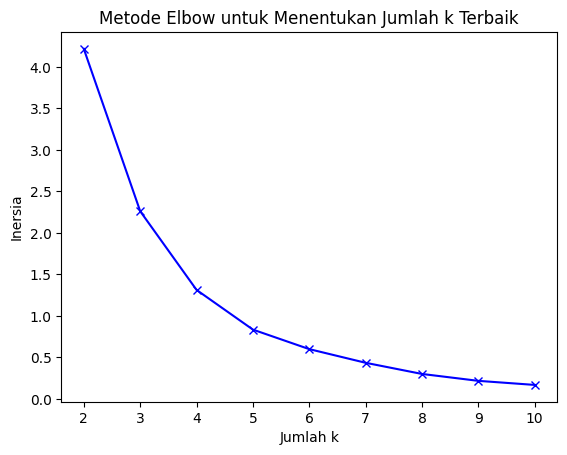

In [6]:
n_clusters = range(2, 11)
inertia = []
silhouette = []
ch_index = []

for k in n_clusters:
    model = KMeans(n_clusters=k, max_iter=500, n_init=50, random_state=42)
    member = model.fit_predict(X, y=None) 

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)

    inertia.append(model.inertia_)
    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)

plt.plot(n_clusters, inertia, 'bx-')
plt.xlabel('Jumlah k')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah k Terbaik')
plt.show()

In [7]:
for i, s, c in zip(n_clusters, silhouette, ch_index):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]

print('\nCluster Terbaik Berdasarkan CH Index dan Silhoutte Score')
print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

Jumlah Cluster = 2
Silhouette Score = 0.6343480726905277
CH Index Score = 169.74313377287834

Jumlah Cluster = 3
Silhouette Score = 0.6427048132797701
CH Index Score = 207.0439538140205

Jumlah Cluster = 4
Silhouette Score = 0.5613142333799158
CH Index Score = 263.3515289389647

Jumlah Cluster = 5
Silhouette Score = 0.5726699065402356
CH Index Score = 324.3211899958849

Jumlah Cluster = 6
Silhouette Score = 0.5805159976304833
CH Index Score = 366.92181452388036

Jumlah Cluster = 7
Silhouette Score = 0.5948174865975683
CH Index Score = 424.85202351032444

Jumlah Cluster = 8
Silhouette Score = 0.5599837357372445
CH Index Score = 529.5456248996408

Jumlah Cluster = 9
Silhouette Score = 0.5626562044355213
CH Index Score = 639.969135493779

Jumlah Cluster = 10
Silhouette Score = 0.5678881603828331
CH Index Score = 731.3306613313924


Cluster Terbaik Berdasarkan CH Index dan Silhoutte Score
Jumlah Cluster Silhoutte = 3
Nilai Silhoutte Score = 0.6427048132797701

Jumlah Cluster CH Index = 10


In [8]:
kmeans = KMeans(n_clusters=7, max_iter=500, n_init=50, random_state=42)
member = kmeans.fit_predict(X)

df['cluster'] = kmeans.labels_
df['cluster'].value_counts()

1    52
3    27
6    21
0    11
5     6
2     1
4     1
Name: cluster, dtype: int64

In [9]:
df[df['cluster'] == 6]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
13,Customer 13,228091,20,13418,6
14,Customer 14,393048,21,23121,6
15,Customer 15,136700,22,8042,6
30,Customer 30,154691,20,9100,6
34,Customer 34,0,20,0,6
35,Customer 35,454770,23,26752,6
43,Customer 43,222922,21,13114,6
48,Customer 48,124871,24,7346,6
57,Customer 57,311,20,19,6
59,Customer 59,159541,25,9385,6


<Axes: xlabel='cluster', ylabel='Rata-rata'>

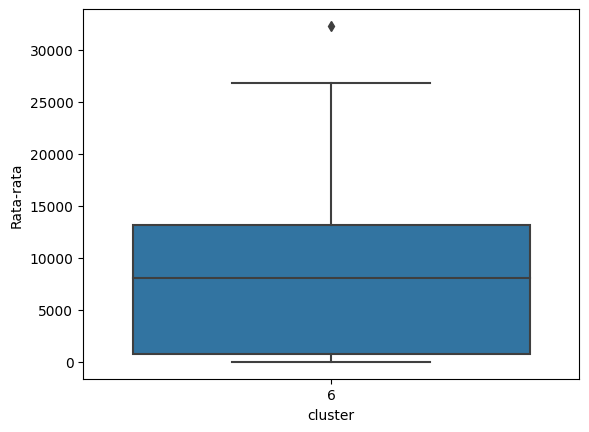

In [10]:
sns.boxplot(x='cluster', y='Rata-rata', data=df[df['cluster'] == 6])

In [11]:
df.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)

C:\Users\Device OCA\AppData\Local\Temp\ipykernel_7696\1642471285.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)


,Total,Rentang Greentick Ke Juni 2023,Rata-rata
cluster,,,
2,56674832.000,36.000,3333814.000
4,13092618.000,9.000,1454736.000
5,2256780.833,37.833,132752.333
0,784845.818,29.455,46167.909
3,268622.222,12.667,22126.407
1,91414.250,4.077,17080.865
6,156302.905,21.762,9194.762


In [12]:
df.groupby('cluster').describe()

Total                                                     \
         count         mean         std          min          25%   
cluster                                                             
0       11.000   784845.818  898153.915    28171.000    85540.000   
1       52.000    91414.250  254021.760        0.000       36.000   
2        1.000 56674832.000         NaN 56674832.000 56674832.000   
3       27.000   268622.222  565650.094      279.000    10410.000   
4        1.000 13092618.000         NaN 13092618.000 13092618.000   
5        6.000  2256780.833 4837960.714       53.000    48717.750   
6       21.000   156302.905  159791.864        0.000    13036.000   

                                               Rentang Greentick Ke Juni 2023  \
                 50%          75%          max                          count   
cluster                                                                         
0         346373.000  1334839.000  2350727.000                         11.000   
1           2374.000    24847.500  1578066.000                         52.000   
2       56674832.000 56674832.000 56674832.000                          1.000   
3          52302.000   148629.000  2251775.000                         27.000   
4       13092618.000 13092618.000 13092618.000                          1.000   
5         272780.000   751531.000 12109927.000                          6.000   
6         136700.000   222922.000   548672.000                         21.000   

                ...               Rata-rata                         \
          mean  ...    75%    max     count        mean        std   
cluster         ...                                                  
0       29.455  ... 31.000 32.000    11.000   46167.909  52832.625   
1        4.077  ...  6.000  8.000    52.000   17080.865  49133.384   
2       36.000  ... 36.000 36.000     1.000 3333814.000        NaN   
3       12.667  ... 14.000 16.000    27.000   22126.407  49930.833   
4        9.000  ...  9.000  9.000     1.000 1454736.000        NaN   
5       37.833  ... 39.500 41.000     6.000  132752.333 284585.831   
6       21.762  ... 24.000 25.000    21.000    9194.762   9399.624   

                                                                     
                min         25%         50%         75%         max  
cluster                                                              
0          1658.000    5032.500   20375.000   78520.500  138279.000  
1             0.000       9.750     562.000    7125.250  315614.000  
2       3333814.000 3333814.000 3333814.000 3333814.000 3333814.000  
3            28.000     926.000    3509.000   11420.000  204707.000  
4       1454736.000 1454736.000 1454736.000 1454736.000 1454736.000  
5             4.000    2866.250   16046.500   44208.000  712349.000  
6             0.000     767.000    8042.000   13114.000   32275.000  

[7 rows x 24 columns]

<Axes: xlabel='cluster', ylabel='Rata-rata'>

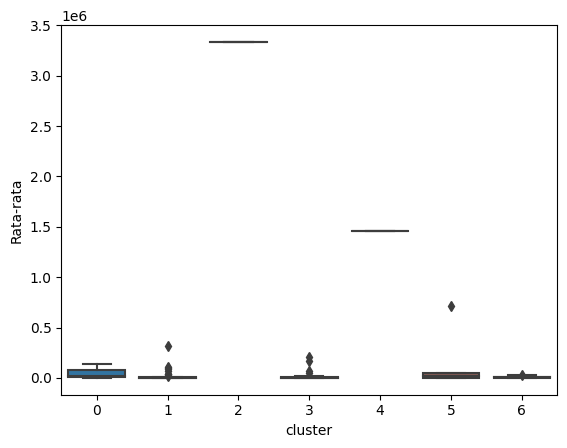

In [13]:
sns.boxplot(x='cluster', y='Rata-rata', data=df)

In [14]:
df1 = df.copy()
df1 = df1[(df1['cluster']!=2) & (df1['cluster']!=4)]

<Axes: xlabel='cluster', ylabel='Rata-rata'>

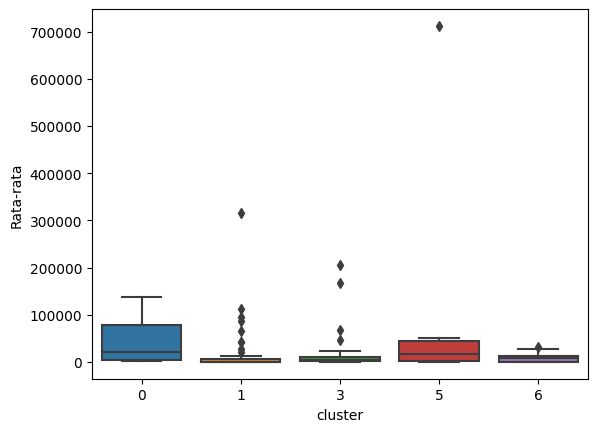

In [15]:
sns.boxplot(x='cluster', y='Rata-rata', data=df1)

<Axes: xlabel='cluster', ylabel='Rata-rata'>

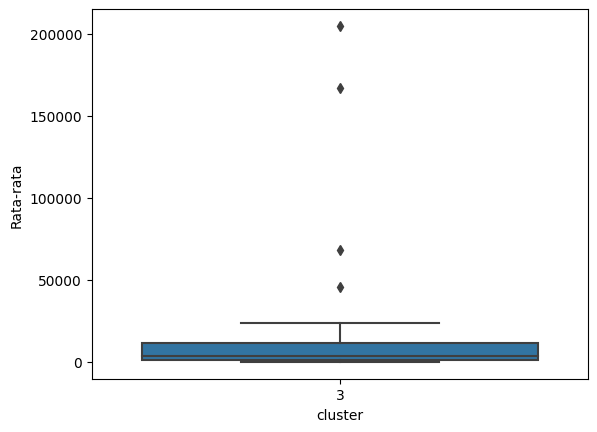

In [16]:
sns.boxplot(x='cluster', y='Rata-rata', data=df1[df1['cluster'] == 3])

In [17]:
X = df1[fitur]
scaller = MinMaxScaler()
X = scaller.fit_transform(X)
X = pd.DataFrame(X, columns=fitur)

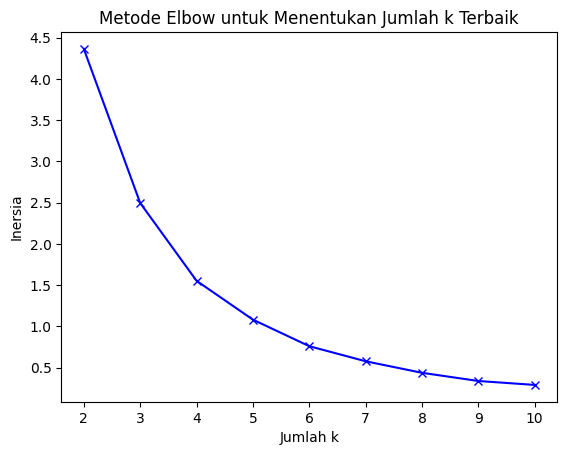

In [18]:
n_clusters = range(2, 11)
inertia = []
silhouette = []
ch_index = []

for k in n_clusters:
    model = KMeans(n_clusters=k, max_iter=500, n_init=50, random_state=42)
    member = model.fit_predict(X, y=None) 

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)

    inertia.append(model.inertia_)
    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)

plt.plot(n_clusters, inertia, 'bx-')
plt.xlabel('Jumlah k')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah k Terbaik')
plt.show()

In [19]:
for i, s, c in zip(n_clusters, silhouette, ch_index):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]

print('\nCluster Terbaik Berdasarkan CH Index dan Silhoutte Score')
print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

Jumlah Cluster = 2
Silhouette Score = 0.6058977511576127
CH Index Score = 154.9966051753943

Jumlah Cluster = 3
Silhouette Score = 0.6124513012378733
CH Index Score = 176.94204970235768

Jumlah Cluster = 4
Silhouette Score = 0.5180322360559516
CH Index Score = 210.7918147392715

Jumlah Cluster = 5
Silhouette Score = 0.5114673783552228
CH Index Score = 237.07056198963372

Jumlah Cluster = 6
Silhouette Score = 0.5460962726799732
CH Index Score = 276.8796961500601

Jumlah Cluster = 7
Silhouette Score = 0.5584521245665618
CH Index Score = 306.7678721897404

Jumlah Cluster = 8
Silhouette Score = 0.5084822585625216
CH Index Score = 348.7626511787738

Jumlah Cluster = 9
Silhouette Score = 0.5157022286919936
CH Index Score = 394.8659285085443

Jumlah Cluster = 10
Silhouette Score = 0.5322785020851076
CH Index Score = 406.60591011802467


Cluster Terbaik Berdasarkan CH Index dan Silhoutte Score
Jumlah Cluster Silhoutte = 3
Nilai Silhoutte Score = 0.6124513012378733

Jumlah Cluster CH Index = 10

In [20]:
kmeans = KMeans(n_clusters=6, max_iter=500, n_init=50, random_state=42)
member = kmeans.fit_predict(X)

df1['cluster'] = kmeans.labels_
df1['cluster'].value_counts()

0    51
5    25
1    21
3    16
4     3
2     1
Name: cluster, dtype: int64

In [21]:
df1.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)

C:\Users\Device OCA\AppData\Local\Temp\ipykernel_7696\1858139095.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)


,Total,Rentang Greentick Ke Juni 2023,Rata-rata
cluster,,,
2,12109927.000,34.000,712349.000
4,1888993.333,9.000,229111.333
3,629003.875,32.312,37000.750
0,62264.216,4.059,11227.275
1,156302.905,21.762,9194.762
5,126555.440,12.800,9027.720


In [22]:
from scipy import stats
df2 = data.copy()
# df2 = (df2[(np.abs(stats.zscore(df2[fitur])) < 3).all(axis=1)])
# df2.shape

Text(0, 0.5, 'Density')

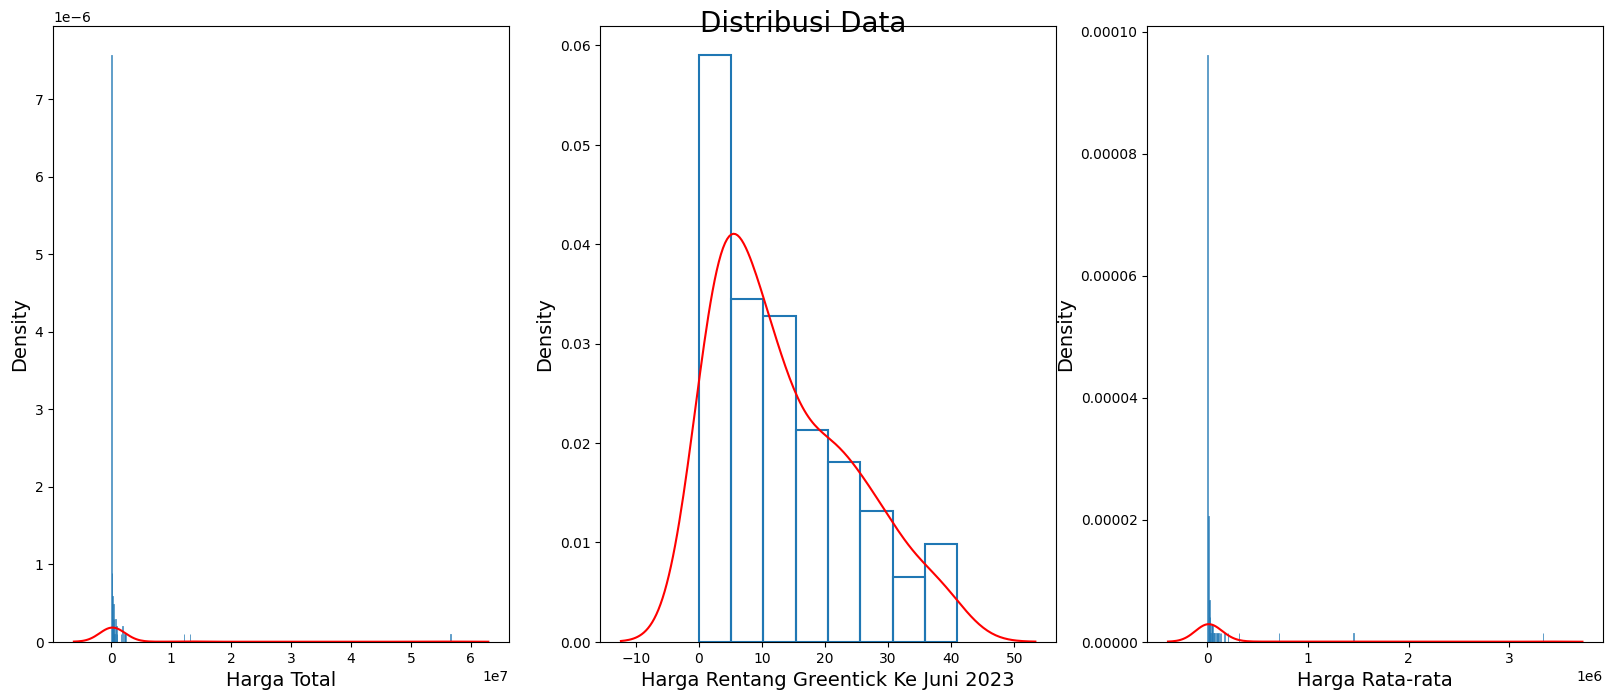

In [23]:
# make plot to see the distribution of the data
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle("Distribusi Data", fontsize=20, y=0.9)
sns.histplot(df2["Total"], ax=ax[0], fill=False, stat="density").set_xlabel('Harga Total', fontsize=14)
sns.kdeplot(df2["Total"], ax=ax[0], color="red").set_ylabel('Density', fontsize=14)

sns.histplot(df2["Rentang Greentick Ke Juni 2023"], ax=ax[1], fill=False, stat="density").set_xlabel('Harga Rentang Greentick Ke Juni 2023', fontsize=14)
sns.kdeplot(df2["Rentang Greentick Ke Juni 2023"], color="red", ax=ax[1]).set_ylabel('Density', fontsize=14)

sns.histplot(df2["Rata-rata"], ax=ax[2], fill=False, stat="density").set_xlabel('Harga Rata-rata', fontsize=14)
sns.kdeplot(df2["Rata-rata"], color="red", ax=ax[2]).set_ylabel('Density', fontsize=14)

In [24]:
df2.quantile(0.25)

C:\Users\Device OCA\AppData\Local\Temp\ipykernel_7696\898561981.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.quantile(0.25)


Total                            1713.000
Rentang Greentick Ke Juni 2023      4.000
Rata-rata                         203.000
Name: 0.25, dtype: float64

In [25]:
df2.quantile(0.75)

C:\Users\Device OCA\AppData\Local\Temp\ipykernel_7696\1098644295.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.quantile(0.75)


Total                            212140.000
Rentang Greentick Ke Juni 2023       20.000
Rata-rata                         15273.000
Name: 0.75, dtype: float64

In [26]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR=Q3-Q1

df2=df2[~((df2<(Q1-1.5*IQR))|(df2>(Q3+1.5*IQR))).any(axis=1)]
df2.describe()

C:\Users\Device OCA\AppData\Local\Temp\ipykernel_7696\1989557104.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
C:\Users\Device OCA\AppData\Local\Temp\ipykernel_7696\1989557104.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
C:\Users\Device OCA\AppData\Local\Temp\ipykernel_7696\1989557104.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2=df2[~((df2<(Q1-1.5*IQR))|(df2>(Q3+1.5*IQR))).any(axis=1)]


,Total,Rentang Greentick Ke Juni 2023,Rata-rata
count,98.000,98.000,98.000
mean,62198.265,12.500,4888.755
std,102077.667,10.164,6912.454
min,0.000,0.000,0.000
25%,368.750,4.000,127.750
50%,15341.000,10.500,1791.500
75%,69343.250,20.000,6763.750
max,454770.000,41.000,26752.000


Text(0, 0.5, 'Density')

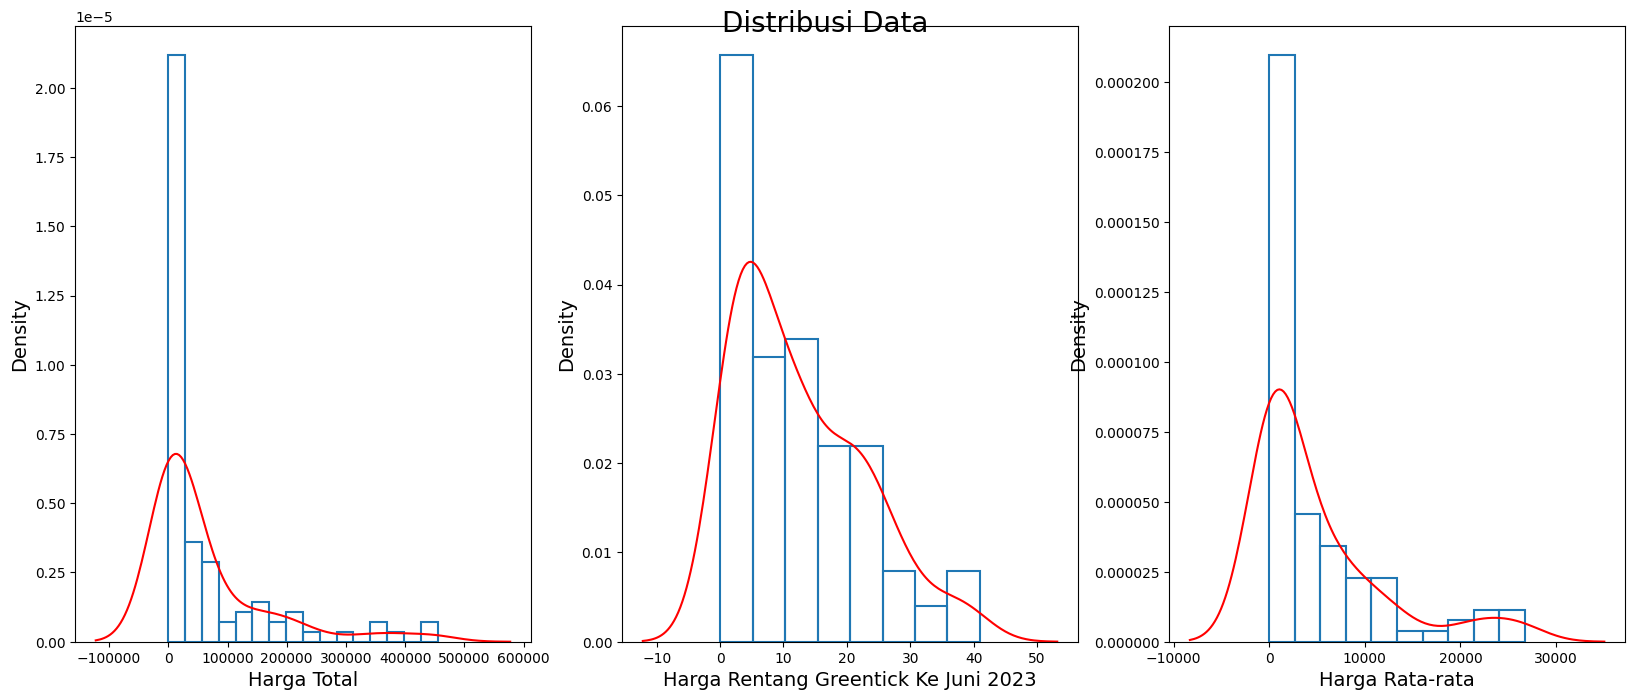

In [27]:
# make plot to see the distribution of the data
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle("Distribusi Data", fontsize=20, y=0.9)
sns.histplot(df2["Total"], ax=ax[0], fill=False, stat="density").set_xlabel('Harga Total', fontsize=14)
sns.kdeplot(df2["Total"], ax=ax[0], color="red").set_ylabel('Density', fontsize=14)

sns.histplot(df2["Rentang Greentick Ke Juni 2023"], ax=ax[1], fill=False, stat="density").set_xlabel('Harga Rentang Greentick Ke Juni 2023', fontsize=14)
sns.kdeplot(df2["Rentang Greentick Ke Juni 2023"], color="red", ax=ax[1]).set_ylabel('Density', fontsize=14)

sns.histplot(df2["Rata-rata"], ax=ax[2], fill=False, stat="density").set_xlabel('Harga Rata-rata', fontsize=14)
sns.kdeplot(df2["Rata-rata"], color="red", ax=ax[2]).set_ylabel('Density', fontsize=14)

In [28]:
X = df2[fitur]
# scaller = MinMaxScaler()
# X = scaller.fit_transform(X)
# X = pd.DataFrame(X, columns=fitur)

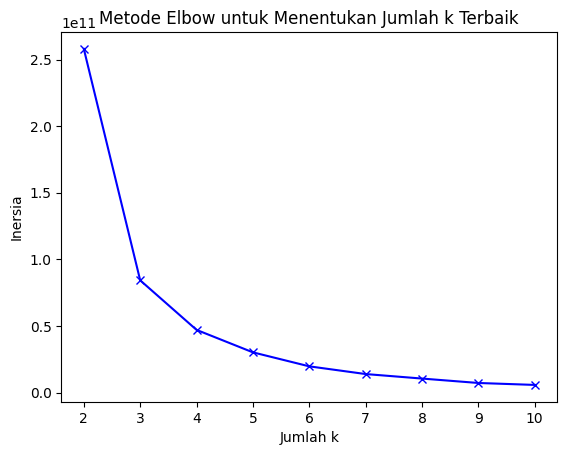

In [29]:
n_clusters = range(2, 11)
inertia = []
silhouette = []
ch_index = []

for k in n_clusters:
    model = KMeans(n_clusters=k, max_iter=500, n_init=50, random_state=42)
    member = model.fit_predict(X, y=None) 

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)

    inertia.append(model.inertia_)
    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)

plt.plot(n_clusters, inertia, 'bx-')
plt.xlabel('Jumlah k')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah k Terbaik')
plt.show()

In [30]:
for i, s, c in zip(n_clusters, silhouette, ch_index):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]

print('\nCluster Terbaik Berdasarkan CH Index dan Silhoutte Score')
print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

Jumlah Cluster = 2
Silhouette Score = 0.777623164715673
CH Index Score = 281.8023526743534

Jumlah Cluster = 3
Silhouette Score = 0.7769168906722781
CH Index Score = 524.8582971636218

Jumlah Cluster = 4
Silhouette Score = 0.7076079728095555
CH Index Score = 644.8770979974039

Jumlah Cluster = 5
Silhouette Score = 0.6928064145280435
CH Index Score = 758.9085275755766

Jumlah Cluster = 6
Silhouette Score = 0.6910088152223954
CH Index Score = 931.389671020672

Jumlah Cluster = 7
Silhouette Score = 0.6711312653257878
CH Index Score = 1093.8218143897445

Jumlah Cluster = 8
Silhouette Score = 0.6718990519383646
CH Index Score = 1230.4305202377543

Jumlah Cluster = 9
Silhouette Score = 0.6802519445343274
CH Index Score = 1561.9521485156847

Jumlah Cluster = 10
Silhouette Score = 0.6934863043056604
CH Index Score = 1724.459885571471


Cluster Terbaik Berdasarkan CH Index dan Silhoutte Score
Jumlah Cluster Silhoutte = 2
Nilai Silhoutte Score = 0.777623164715673

Jumlah Cluster CH Index = 10
Ni

In [31]:
kmeans = KMeans(n_clusters=3, max_iter=500, n_init=50, random_state=42)
member = kmeans.fit_predict(X)

df2['cluster'] = kmeans.labels_
df2['cluster'].value_counts()

0    77
1    15
2     6
Name: cluster, dtype: int64

In [32]:
df2.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)

C:\Users\Device OCA\AppData\Local\Temp\ipykernel_7696\185097041.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)


,Total,Rentang Greentick Ke Juni 2023,Rata-rata
cluster,,,
2,380653.667,24.167,22860.167
1,166347.600,20.733,11895.067
0,17094.727,9.987,2123.519


<Axes: xlabel='cluster', ylabel='Rata-rata'>

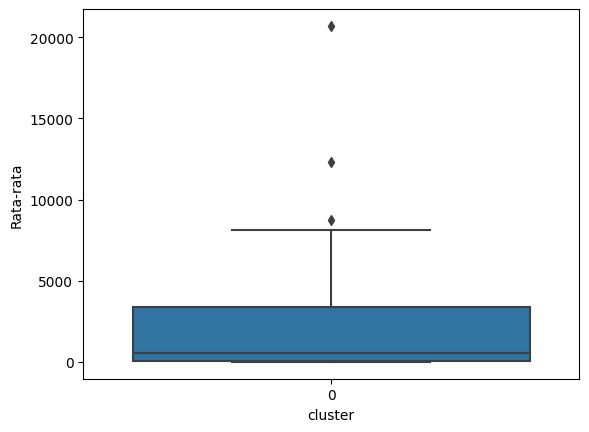

In [33]:
sns.boxplot(x='cluster', y='Rata-rata', data=df2[df2['cluster'] == 0])

In [34]:
# sns.boxplot(x='cluster', y='Rata-rata', data=df2[df2['cluster'] == 3])

In [35]:
df2[df2['cluster'] == 0].describe()

,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
count,77.000,77.000,77.000,77.000
mean,17094.727,9.987,2123.519,0.000
std,23014.336,9.217,3341.306,0.000
min,0.000,0.000,0.000,0.000
25%,189.000,3.000,31.000,0.000
50%,5311.000,7.000,571.000,0.000
75%,25989.000,14.000,3363.000,0.000
max,82788.000,41.000,20697.000,0.000


In [36]:
from scipy import stats
df2 = data.copy()
df2 = (df2[(np.abs(stats.zscore(df2[fitur])) < 3).all(axis=1)])
df2.shape

(117, 4)

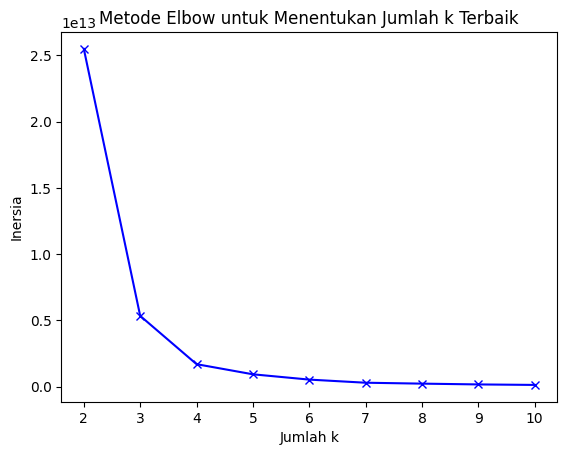

In [37]:
X = df2[fitur]

n_clusters = range(2, 11)
inertia = []
silhouette = []
ch_index = []

for k in n_clusters:
    model = KMeans(n_clusters=k, max_iter=500, n_init=50, random_state=42)
    member = model.fit_predict(X, y=None) 

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)

    inertia.append(model.inertia_)
    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)

plt.plot(n_clusters, inertia, 'bx-')
plt.xlabel('Jumlah k')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah k Terbaik')
plt.show()

In [38]:
for i, s, c in zip(n_clusters, silhouette, ch_index):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]

print('\nCluster Terbaik Berdasarkan CH Index dan Silhoutte Score')
print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

Jumlah Cluster = 2
Silhouette Score = 0.9606658418480178
CH Index Score = 634.7689382184228

Jumlah Cluster = 3
Silhouette Score = 0.8754071309636088
CH Index Score = 1715.0489189508862

Jumlah Cluster = 4
Silhouette Score = 0.7837173430741196
CH Index Score = 3645.8127021274236

Jumlah Cluster = 5
Silhouette Score = 0.7571167757666882
CH Index Score = 4950.004438839629

Jumlah Cluster = 6
Silhouette Score = 0.7567727700007737
CH Index Score = 6870.664082478858

Jumlah Cluster = 7
Silhouette Score = 0.7405307252645972
CH Index Score = 10154.91798470565

Jumlah Cluster = 8
Silhouette Score = 0.7358031610625088
CH Index Score = 11185.31262202761

Jumlah Cluster = 9
Silhouette Score = 0.732697112015068
CH Index Score = 13106.446804767396

Jumlah Cluster = 10
Silhouette Score = 0.6740763068039617
CH Index Score = 14757.192858714947


Cluster Terbaik Berdasarkan CH Index dan Silhoutte Score
Jumlah Cluster Silhoutte = 2
Nilai Silhoutte Score = 0.9606658418480178

Jumlah Cluster CH Index = 10

In [39]:
kmeans = KMeans(n_clusters=4, max_iter=500, n_init=50, random_state=42)
member = kmeans.fit_predict(X)

df2['cluster'] = kmeans.labels_
df2['cluster'].value_counts()

0    93
3    17
2     6
1     1
Name: cluster, dtype: int64

In [40]:
df2.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)

C:\Users\Device OCA\AppData\Local\Temp\ipykernel_7696\185097041.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)


,Total,Rentang Greentick Ke Juni 2023,Rata-rata
cluster,,,
1,12109927.000,34.000,712349.000
2,1995790.833,19.500,176396.833
3,545608.824,18.294,50192.588
0,44114.720,11.828,3860.914


<Axes: xlabel='cluster', ylabel='Rata-rata'>

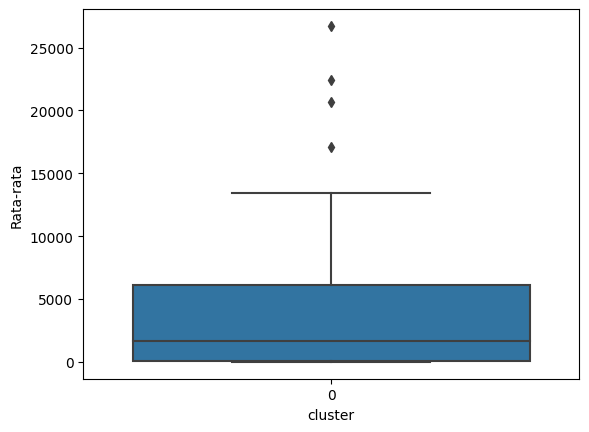

In [41]:
sns.boxplot(x='cluster', y='Rata-rata', data=df2[df2['cluster'] == 0])